In [1]:
import os, sys
module_rootdir = '../..'
dataset_rootdir = '../../..'
label_rootdir = module_rootdir
weight_rootdir = module_rootdir
sys.path.append(module_rootdir)

from modules.first_stage.set_parameters_for_inference import set_param_for_inference
from modules.evaluation.plot_func import plot_roc, plot_precision_recall, compare_roc, compare_pr
from modules.evaluation.score_tuning import ROC_for_score_tuning, display_performance

In [2]:
weights_file = 'model_weights/1705990924432/anchor_free_detector.pt'

param_dict = set_param_for_inference(
    dataset_type = 'bdd',
    module_rootdir = module_rootdir,
    dataset_rootdir = dataset_rootdir,
    label_rootdir = label_rootdir,
    batch_size = 1,
    trained_weights_file = os.path.join(weight_rootdir, weights_file))

device = param_dict['device']
dataset_param = param_dict['dataset_param']
dataset_train = param_dict['dataset_train']
dataset_val = param_dict['dataset_val'] 
detector = param_dict['detector']

GPU is available. Good to go!
printing model config parameters
----------------------------------------------------------------------------------------------------
backbone                        : efficientnet_b4
num_backbone_nodes              : 4
num_extra_blocks                : 1
num_levels                      : 5
extra_blocks_feat_dim           : 512
num_fpn_blocks                  : 2
fpn_feat_dim                    : 128
prediction head stem_channels   : [128, 128, 128, 128]
activation                      : swish
image dimension BDD (H, W, D)   : (360, 640, 3)
image dimension KITTI (H, W, D) : (263, 873, 3)
num_classes                     : 2
DEVICE                          : cuda
****************************************************************************************************
 
Load JSON file .. please wait
annotations from 69863/69863 aggregated : Aggregation COMPLETE
Load JSON file .. please wait
annotations from 10000/10000 aggregated : Aggregation COMPLETE


In [3]:
dataset = dataset_val
gt_iou_thresh = 0.5
nms_thresh = 0.35
image_start_idx = 0
num_images = 6000

generating detection rate & FP_per_image for score:  0.05
generating detection rate & FP_per_image for score:  0.1
generating detection rate & FP_per_image for score:  0.2
generating detection rate & FP_per_image for score:  0.3
generating detection rate & FP_per_image for score:  0.4
generating detection rate & FP_per_image for score:  0.5
generating detection rate & FP_per_image for score:  0.6
generating detection rate & FP_per_image for score:  0.7
generating detection rate & FP_per_image for score:  0.8
generating detection rate & FP_per_image for score:  0.9
generating detection rate & FP_per_image for score:  0.99


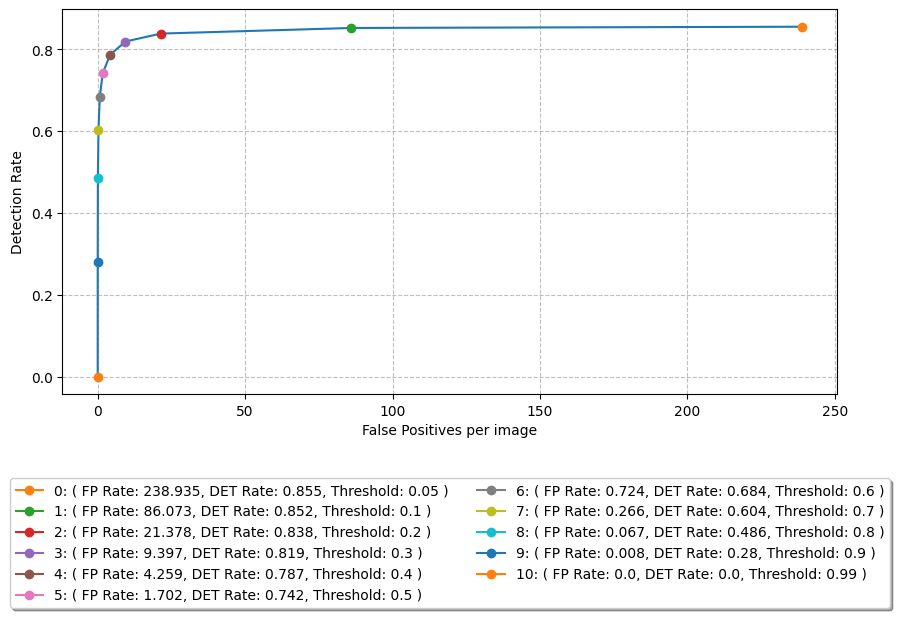

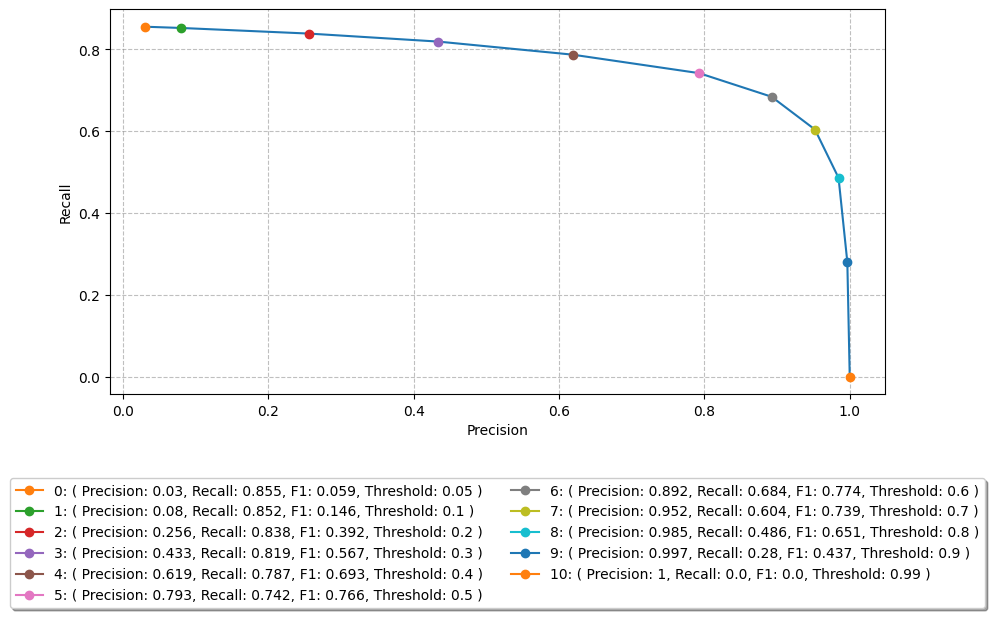

0: ( Threshold: 0.05, F1: 0.05880547461414785, DET Rate: 0.8550917309226269, FP Rate: 238.93466666666666 )
1: ( Threshold: 0.1, F1: 0.14614728091263868, DET Rate: 0.8520530254111749, FP Rate: 86.073 )
2: ( Threshold: 0.2, F1: 0.39225112745206947, DET Rate: 0.8383218748813006, FP Rate: 21.378333333333334 )
3: ( Threshold: 0.3, F1: 0.5667470703060815, DET Rate: 0.8188361757891138, FP Rate: 9.396666666666667 )
4: ( Threshold: 0.4, F1: 0.6926163053108441, DET Rate: 0.7868917840999734, FP Rate: 4.259166666666666 )
5: ( Threshold: 0.5, F1: 0.7663566074021745, DET Rate: 0.7416720477076766, FP Rate: 1.7016666666666667 )
6: ( Threshold: 0.6, F1: 0.7744723855805102, DET Rate: 0.6840505944467656, FP Rate: 0.7235 )
7: ( Threshold: 0.7, F1: 0.7390233131115915, DET Rate: 0.6038477608538763, FP Rate: 0.26616666666666666 )
8: ( Threshold: 0.8, F1: 0.6507464204877801, DET Rate: 0.4859649789189805, FP Rate: 0.06666666666666667 )
9: ( Threshold: 0.9, F1: 0.4374573808888494, DET Rate: 0.28022562388422534,

In [4]:
selected_clssid = 0
SCORE_THRESH_class0, \
DETECTION_RATE_LIST_class0, \
FP_RATE_PER_IMAGE_LIST_class0, \
PRECISION_class0, RECALL_class0, F1_class0 \
    = ROC_for_score_tuning(
        num_images = num_images, 
        image_start_idx = image_start_idx, 
        selected_clssid = selected_clssid,
        detector = detector, 
        dataset = dataset, 
        dataset_param = dataset_param,
        iou_thresh = gt_iou_thresh, 
        nms_thresh = nms_thresh, 
        device = device)

plot_roc(SCORE_THRESH_class0, FP_RATE_PER_IMAGE_LIST_class0, DETECTION_RATE_LIST_class0, figsize=(10, 5))
plot_precision_recall(SCORE_THRESH_class0, F1_class0, PRECISION_class0, RECALL_class0, figsize=(10, 5))
display_performance(SCORE_THRESH_class0, DETECTION_RATE_LIST_class0, FP_RATE_PER_IMAGE_LIST_class0, F1_class0)

generating detection rate & FP_per_image for score:  0.05
generating detection rate & FP_per_image for score:  0.1
generating detection rate & FP_per_image for score:  0.2
generating detection rate & FP_per_image for score:  0.3
generating detection rate & FP_per_image for score:  0.4
generating detection rate & FP_per_image for score:  0.5
generating detection rate & FP_per_image for score:  0.6
generating detection rate & FP_per_image for score:  0.7
generating detection rate & FP_per_image for score:  0.8
generating detection rate & FP_per_image for score:  0.9
generating detection rate & FP_per_image for score:  0.99


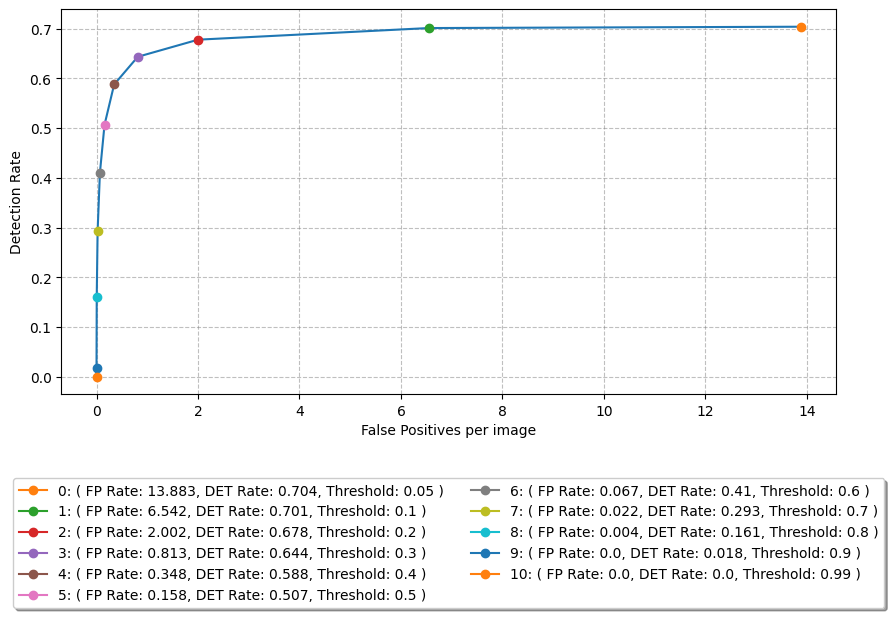

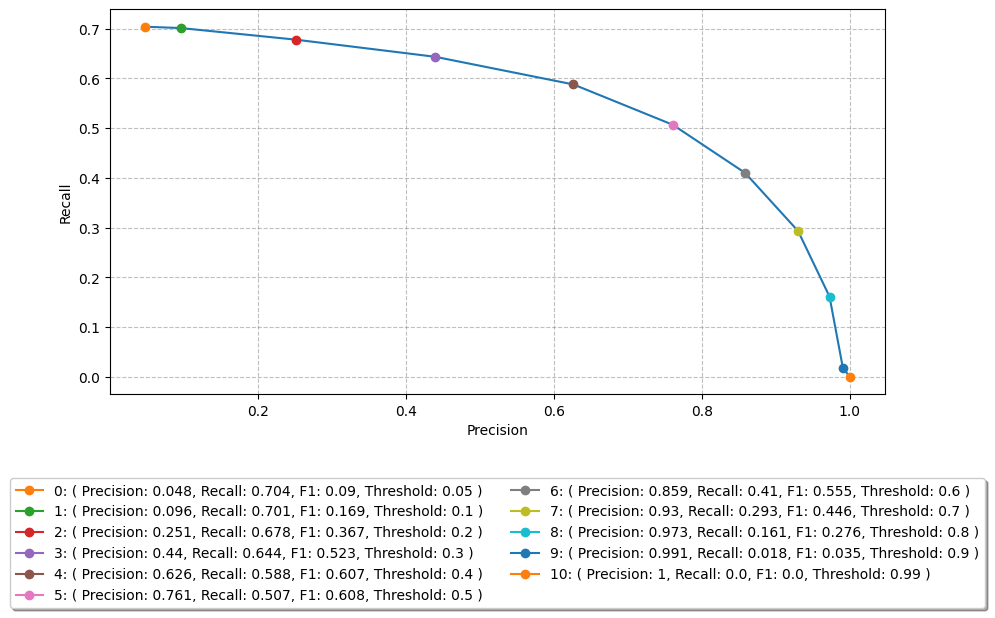

0: ( Threshold: 0.05, F1: 0.08968129962971684, DET Rate: 0.7040833473365821, FP Rate: 13.8835 )
1: ( Threshold: 0.1, F1: 0.16905972174406125, DET Rate: 0.7013947235758696, FP Rate: 6.542333333333334 )
2: ( Threshold: 0.2, F1: 0.36685153195745074, DET Rate: 0.6780373046546799, FP Rate: 2.002 )
3: ( Threshold: 0.3, F1: 0.5225102319236016, DET Rate: 0.6435893127205512, FP Rate: 0.8131666666666667 )
4: ( Threshold: 0.4, F1: 0.606622746185853, DET Rate: 0.5879684086708117, FP Rate: 0.3476666666666667 )
5: ( Threshold: 0.5, F1: 0.6083711548159354, DET Rate: 0.5068055788943034, FP Rate: 0.158 )
6: ( Threshold: 0.6, F1: 0.5549869214147617, DET Rate: 0.410015123508654, FP Rate: 0.067 )
7: ( Threshold: 0.7, F1: 0.44569384104267834, DET Rate: 0.2930599899176609, FP Rate: 0.021833333333333333 )
8: ( Threshold: 0.8, F1: 0.2764883955600404, DET Rate: 0.1611493866577046, FP Rate: 0.0045 )
9: ( Threshold: 0.9, F1: 0.034995047870584356, DET Rate: 0.017812132414720214, FP Rate: 0.00016666666666666666 )


In [5]:
selected_clssid = 1
SCORE_THRESH_class1, \
DETECTION_RATE_LIST_class1, \
FP_RATE_PER_IMAGE_LIST_class1, \
PRECISION_class1, RECALL_class1, F1_class1 \
    = ROC_for_score_tuning(
        num_images = num_images, 
        image_start_idx = image_start_idx, 
        selected_clssid = selected_clssid,
        detector = detector, 
        dataset = dataset, 
        dataset_param = dataset_param,
        iou_thresh = gt_iou_thresh, 
        nms_thresh = nms_thresh, 
        device = device)

plot_roc(SCORE_THRESH_class1, FP_RATE_PER_IMAGE_LIST_class1, DETECTION_RATE_LIST_class1, figsize=(10, 5))
plot_precision_recall(SCORE_THRESH_class1, F1_class1, PRECISION_class1, RECALL_class1, figsize=(10, 5))
display_performance(SCORE_THRESH_class1, DETECTION_RATE_LIST_class1, FP_RATE_PER_IMAGE_LIST_class1, F1_class1)

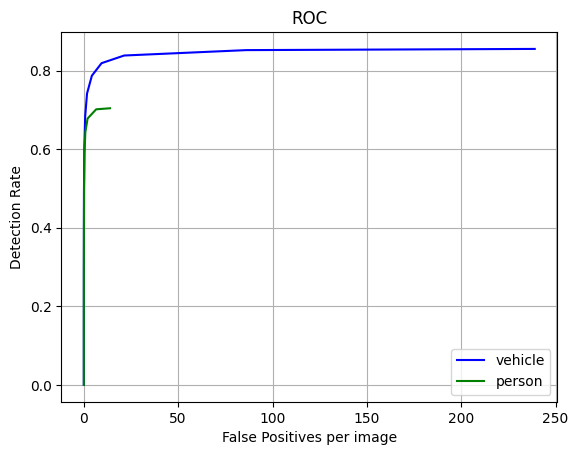

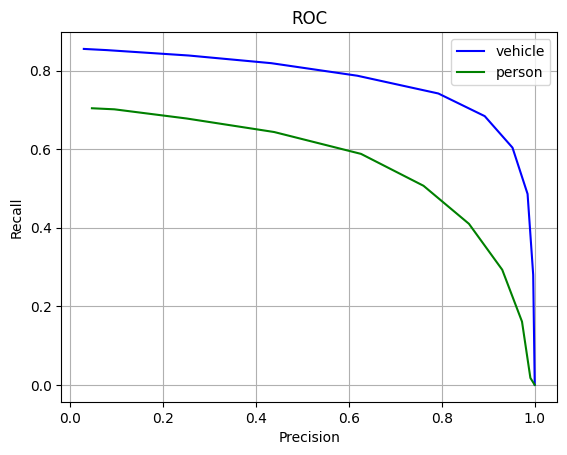

In [6]:

from modules.dataset_utils.bdd_dataset_utils.constants import _IDX_TO_OBJ_CLASS_

compare_roc(
    FP_RATE_PER_IMAGE_LIST_class0, DETECTION_RATE_LIST_class0,
    FP_RATE_PER_IMAGE_LIST_class1, DETECTION_RATE_LIST_class1,
    _IDX_TO_OBJ_CLASS_)

compare_pr(
    PRECISION_class0, RECALL_class0,
    PRECISION_class1, RECALL_class1,
    _IDX_TO_OBJ_CLASS_)